<a href="https://colab.research.google.com/github/YorgosPs/BrainSeq/blob/main/BrainSeq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BrainSeq (Brain Sequences)

A demonstration of various algorithms from statistics, probability theory, graphs, and machine learning on a list of pseudo random numbers kindly generated by my best friend, Jenny Jumai'an. 
My objective is to investigate whether Jenny's brain is a random number generator, or if there is an underlying pattern in the succession of numbers predicted. If there is a pattern, can I uncover it?


In [ ]:
%matplotlib inline
import numpy as np
from scipy import stats as stats
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import cm as cm
from sklearn.model_selection import train_test_split
from scipy.stats import kstest as kstest
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Activation

# Dataset

The dataset consists of an array of 847 integers. 

In [ ]:
jenny_responses= np.array([7,4,3,0,9,1,5,2,6,8,0,0,0,5,6,9,1,2,5,5,1,9,0,8,
                          8,6,6,6,5,0,1,9,8,8,9,5,8,2,1,0,5,3,5,5,9,4,3,2,1,
                          0,0,1,1,1,0,1,0,6,9,8,1,5,4,2,1,1,0,7,7,9,2,
                          3,3,8,2,0,0,0,0,9,6,2,7,9,5,3,0,8,8,0,5,0,7,9,5
                          ,3,6,4,5,4,4,2,1,2,1,0,0,1,0,6,3,9,0,2,5,4
                          ,6,2,1,0,0,1,2,9,9,9,9,9,5,6,7,6,5,4,3,2,1,0
                          ,0,1,5,4,7,3,2,9,8,7,7,3,2,8,7,6,5,9,1,2,0,
                          0,0,1,1,2,5,8,9,0,3,2,1,5,0,8,4,3,7,8,8,6,9,0,
                          0,0,0,9,1,3,3,4,4,5,5,6,6,9,8,8,9,2,0,0,0,1,9,9,6,
                          4,3,9,2,3,4,4,0,2,5,9,2,5,8,0,9,0,4,1,4,6,1,3,1,2,5,5,0,
                          7,8,7,0,1,2,3,8,9,1,1,2,7,0,0,0,5,1,1,1,6,5,8,6,9,0,1,0
                          ,1,2,4,3,8,8,5,5,2,2,2,0,2,6,6,1,0,2,0,2,1,1,9,4,4,2,6,2,0,2
                          ,1,2,0,2,0,1,0,6,1,2,2,6,1,8,8,4,7,2,0,3,2,4,1,4,2,3,6,7
                          ,1,9,1,9,0,4,1,9,0,4,2,0,0,5,1,9,0,5,2,6,0,7,2,1,0,7,3,6,
                          5,1,5,1,1,6,2,1,0,1,2,0,1,5,1,6,6,8,2,1,4,5,6,6,7,8,8,9,0,9,0,0,1
                          ,0,0,1,0,0,2,0,0,3,0,0,4,0,0,5,0,0,6,0,0,7,0,0,8,8,
                          9,0,0,8,0,0,7,0,0,6,0,0,5,0,0,4,0,0,3,0,0,2,0,0,1,0,0,0,0,0,0,5,5,1,
                          1,6,6,7,0,2,0,6,8,4,9,9,4,2,0,1,1,3,5,4,1,0,9,1,8,8,1,5,5,3,9,9,4,0,
                          4,3,2,4,1,7,5,0,1,0,0,1,1,2,4,4,1,0,1,4,8,0,0,6,6,0,0,0,1,5,0,0,0,1,
                          9,9,0,0,0,4,1,2,2,2,2,2,1,5,5,5,7,7,8,1,8,2,6,5,5,4,1,3,8,9,7,0,2,0,
                          1,0,4,0,8,9,2,2,7,5,4,2,2,3,3,3,8,3,3,4,3,4,1,4,4,2,4,4,9,4,4,6,4,4,
                          2,5,8,9,9,1,1,1,1,3,1,1,8,8,1,8,6,0,7,7,2,7,3,5,0,7,0,2,8,3,2,4,8,6,
                          4,2,4,1,2,6,8,5,5,5,5,8,2,0,1,9,1,6,1,6,1,6,0,5,1,2,1,4,3,2,3,8,8,7,
                          9,2,8,9,9,6,1,3,0,2,2,4,3,8,6,6,8,5,7,2,3,2,3,1,2,4,1,7,7,3,6,2,3,9,
                          9,2,4,4,4,4,4,8,4,8,3,3,3,3,4,5,3,1,4,6,8,6,2,3,8,6,6,2,6,5,0,9,9,0,
                          8,1,8,0,1,0,2,4,0,4,8,4,1,8,7,1,5,5,0,2,0,2,2,5,0,5,5,1,8,7,4,8,4,0,
                          0,7,5,1,1,1,4,8,6,1,5,9,9,9,6,3,0,2,9,8,9,5,2,0,0,1,2,0,5,8,6,2,1,5,
                          0,1,2,0,1,1,0,2,5,3,0,1,0,0,0,0,0,0,1,4,9,0,2,9,3,0,0,0,0,0,4,1,4,0,
                          2,5,6,2,7,2,7,4,8,3,0,4,2,4,0,4,0,2,1,2,0,2,4,7,9,8,4,1,0,0,0,0])

print( 'Number of samples: ', jenny_responses.shape[0])

Number of samples:  847


# Basic statistics

Statistics such as the mean, (unbiased) variance, etc are the first level of analysis for such dataset.  
We can also examine the Sampling distribution.

In [ ]:
stats.describe(jenny_responses)

DescribeResult(nobs=847, minmax=(0, 9), mean=3.5336481700118063, variance=9.031667880797475, skewness=0.43011682850983196, kurtosis=-1.1324248738185565)

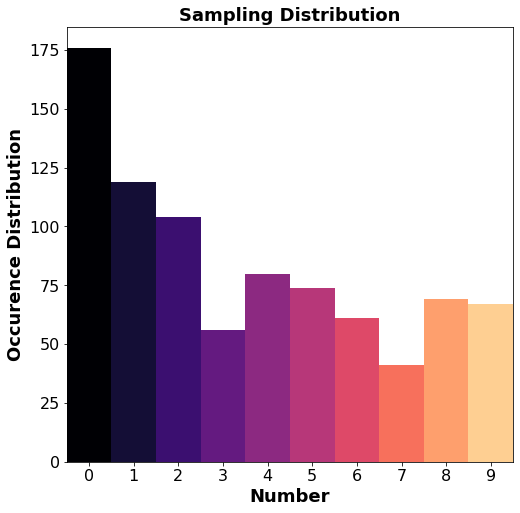

In [ ]:
fig, ax  = plt.subplots(figsize=[8,8])
Ni, bins, patches  = ax.hist(jenny_responses, bins=10, density=False)

Prob = Ni/np.sum(Ni)


plt.xticks(0.45+0.9*np.linspace(0,9,10),['0','1', '2', '3', '4', '5', '6', '7', '8', '9'], fontsize =16);
plt.yticks(fontsize=16)

ax.set_xlim(0, 9)
for i in range(10):
    patches[i].set_facecolor(cm.get_cmap('magma')(i/10))


ax.set_ylabel('Occurence Distribution', fontweight='bold', fontsize=18)
ax.set_xlabel('Number', fontweight='bold', fontsize=18)
ax.set_title('Sampling Distribution', fontweight='bold', fontsize=18);

The statistics of our dataset differ from what we would expect from a random number generator (RNG). If it was indeed a RNG we would find that the sampling distribution resembles the uniform distribution ($U[0,9]$). If the dataset is denoted $\mathbf{s} \in \mathrm{\mathbb{R}}^{847}$ then:  
$\bar{s_i} =\frac{1}{N} \sum_{i=1}^N s_i \rightarrow \frac{9+0}{2} = 4.5, N \rightarrow \infty$  

and

$Var{s_i}= \frac{1}{N-1} \sum_{i=1}^N (\bar{s}-s_i)^2 \rightarrow \frac{(9-0-1)^2-1}{12} = 5.25, N \rightarrow \infty$


### We can, in fact, calculate the distance from the uniform distribution

Kullback-Leibler Distance

In [ ]:
d_kl=[]
for i in range(10):
    d_kl.append(Prob[i]*np.log(Prob[i]/0.1))
    
D_KL = np.sum(d_kl)

print('Kullback-Leibler Distance wrt to the Uniform is: ' , D_KL)

Kullback-Leibler Distance wrt to the Uniform is:  0.08639524773482611


Wasserstein Distance

In [ ]:
D_W = stats.wasserstein_distance(Prob, np.ones(9)*0.1)
print('Wasserstein Distance wrt to the Uniform is: ' , D_W)

Wasserstein Distance wrt to the Uniform is:  0.03421487603305785


# Random Number Generator properties and tests

Even if the distribution we get is not exactly uniform, we can explore the hypothesis that our data are generated from an imperfect RNG.

Replace with Kolmogorov-Smirnov test, Auto-correlation test, Gap test

### Kolmogorov-Smirnov Test

In [ ]:
print(kstest(jenny_responses, 'uniform', args=(0,9)))

print('KS test results in rejection of the hypothesis that the numbers are sampled uniformly')

KstestResult(statistic=0.24885215794306703, pvalue=1.0756789158541056e-46)
KS test results in rejection of the hypothesis that the numbers are sampled uniformly


#### Gap test


In [ ]:
gaps0 = []

for i in range(10):
  gaps0.append(np.diff(np.where(jenny_responses==i)[0]).tolist())

gaps = [item for sublist in gaps0 for item in sublist]


gaps = np.array(gaps)

In [ ]:
Gaps_w = np.ptp(gaps)

Ngi, binss  = np.histogram(gaps, bins=Gaps_w)
Probg = Ngi/np.sum(Ngi)


Gaps_ar = np.arange(np.min(gaps), np.max(gaps))

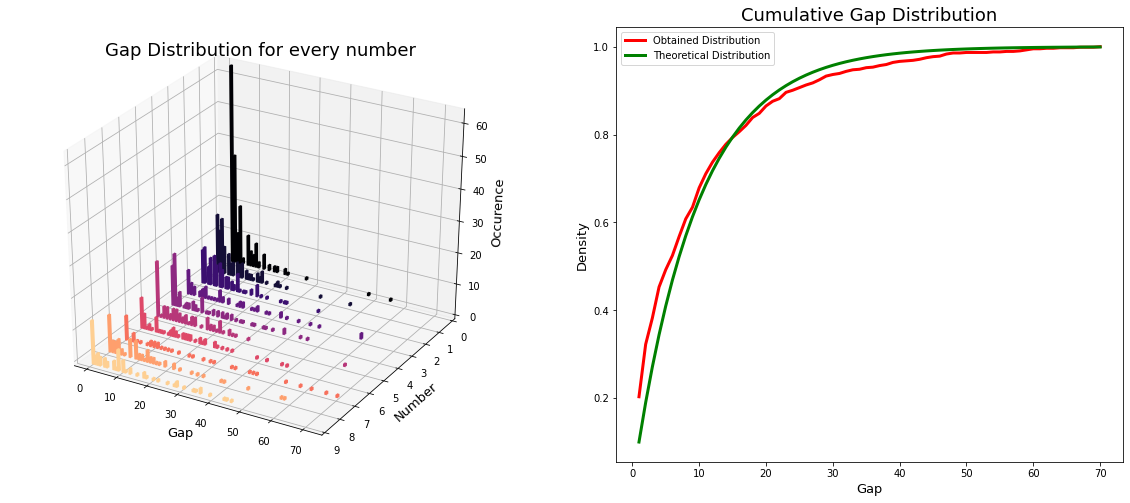

In [ ]:
fig = plt.figure(figsize=[20,8])


ax1 = plt.subplot(121, projection='3d')

s=0

clist= cm.get_cmap('magma')(np.arange(10)/10)
for sublist in gaps0:
  hist_temp, bins_temp = np.histogram(sublist, bins =60)


  xs = (bins_temp[:-1] + bins_temp[1:])/2

  ax1.bar(xs, hist_temp, zs=s, zdir='y', linewidth=15, color=clist[s]) #  ec=c, alpha=0.8)
  ax1.bar(xs, hist_temp, zs=s-0.05, zdir='y', linewidth=15, color=clist[s])#  ec=c, alpha=0.8)
  ax1.bar(xs, hist_temp, zs=s+0.05, zdir='y', linewidth=15, color=clist[s])#  ec=c, alpha=0.8)

  s+=1

ax1.set_ylim(9,0)

ax1.set_yticks(np.arange(10))
ax1.set_title('Gap Distribution for every number', fontsize=18)
ax1.set_xlabel('Gap', fontsize=13)
ax1.set_zlabel('Occurence', fontsize=13)
ax1.set_ylabel('Number', fontsize=13)

ax2 = plt.subplot(122)
ax2.plot(Gaps_ar, np.cumsum(Probg), linewidth=3,color='red', label='Obtained Distribution')
ax2.plot(Gaps_ar, stats.geom.cdf(Gaps_ar, 0.1),linewidth=3, color='green', label='Theoretical Distribution')
ax2.legend()
ax2.set_title('Cumulative Gap Distribution', fontsize=18)
ax2.set_xlabel('Gap', fontsize=13)
ax2.set_ylabel('Density', fontsize=13);

In [ ]:
print(kstest(gaps, 'geom', args=(0.1,)))
print('KS test results in rejection of the hypothesis that the gaps between numbers are sampled from a (theoretically expected) geometric distribution')
print('This is because the dataset is obviously biased towards smaller gaps for smaller numbers.')

KstestResult(statistic=0.1325806451612903, pvalue=2.731361935098649e-13)
KS test results in rejection of the hypothesis that the gaps between numbers are sampled from a (theoretically expected) geometric distribution
This is because the dataset is obviously biased towards smaller gaps for smaller numbers.


In [ ]:
stats.describe(gaps)

DescribeResult(nobs=837, minmax=(1, 71), mean=9.909199522102748, variance=133.63528608095672, skewness=2.1366277158927622, kurtosis=5.259793799723337)

In [ ]:
print('The period of Jennys brain as a RNG is: ', np.mean(gaps))

The period of Jennys brain as a RNG is:  9.909199522102748


The period is large, a good indication for a Random Number Generator.

# Empirical Distribution Function and Inverse Transform Sampling

Given our distribution of numbers, we demonstrate how we can sample a much larger dataset of numbers which follow the same distribution (obeying the law of large numbers)

In other words, asssuming that there is no pattern in the way Jenny generates numbers, only a probability for each of them, we can 'simulate' Jenny's brain to generate random numbers with the same distribution. Here we generate 6000 more samples.

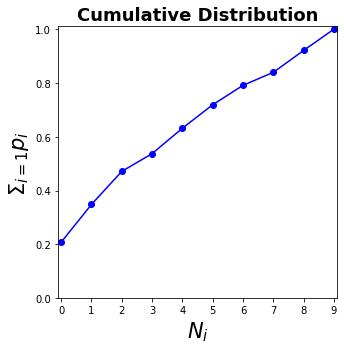

In [ ]:
CumDist =  np.cumsum(Prob)

fig, ax = plt.subplots(figsize=[5,5])
ax.plot(np.arange(10), CumDist, '-o', c='b')
ax.set_ylim(0,1.01)
ax.set_xlim(-0.1, 9.1)
ax.set_xticks(np.arange(10));
ax.set_xlabel('$N_i$', fontsize=21)
ax.set_ylabel('$\Sigma_{i=1}p_i$', fontsize=21)
ax.set_title('Cumulative Distribution', fontweight='bold', fontsize=18)

plt.show()

In [ ]:
edf_samples=[]
for i in range(30000):
    ri = np.random.uniform()
    edf_samples.append(np.min(np.where((ri - CumDist)<0)[0]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


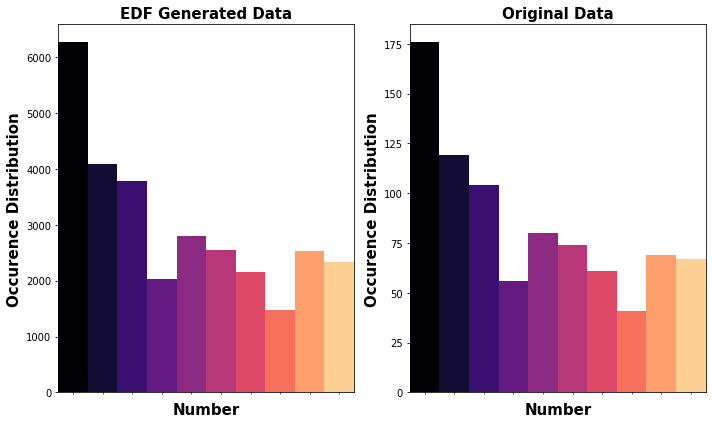

In [ ]:
fig, ax  = plt.subplots(nrows=1, ncols=2, tight_layout=True, figsize=[10,6])

ax[0].set_xticks([])
ax[1].set_xticks([])

# plt.xticks(0.45+0.9*np.linspace(0,9,10),['0','1', '2', '3', '4', '5', '6', '7', '8', '9']);

Ni_edf, bins_edf, patches_edf  = ax[0].hist(edf_samples, bins=10, density=False)

ax[0].set_xticks(0.45+0.9*np.linspace(0,9,10),['0','1', '2', '3', '4', '5', '6', '7', '8', '9']);
ax[1].set_xticks(0.45+0.9*np.linspace(0,9,10),['0','1', '2', '3', '4', '5', '6', '7', '8', '9']);

_,_, patches  = ax[1].hist(jenny_responses, bins=10, density=False)


# plt.xticks(0.45+0.9*np.linspace(0,9,10),['0','1', '2', '3', '4', '5', '6', '7', '8', '9']);

ax[0].set_xlim(0, 9)
ax[1].set_xlim(0, 9)

for i in range(10):
    patches_edf[i].set_facecolor(cm.get_cmap('magma')(i/10))
    patches[i].set_facecolor(cm.get_cmap('magma')(i/10))

ax[1].set_ylabel('Occurence Distribution', fontweight='bold', fontsize=15)
ax[1].set_xlabel('Number', fontweight='bold', fontsize=15)
ax[1].set_title('Original Data', fontweight='bold', fontsize=15);

ax[0].set_ylabel('Occurence Distribution', fontweight='bold', fontsize=15)
ax[0].set_xlabel('Number', fontweight='bold', fontsize=15)
ax[0].set_title('EDF Generated Data', fontweight='bold', fontsize=15);

# Thinking of our data as a Markov Chain
Now, we introduce the assumption that the number generated next, depends only on the number last generated. In other words:  
$P(X_k =x | X_{k-1}, X_{k-2}, ...) = P(X_k =x| X_{k-1})$

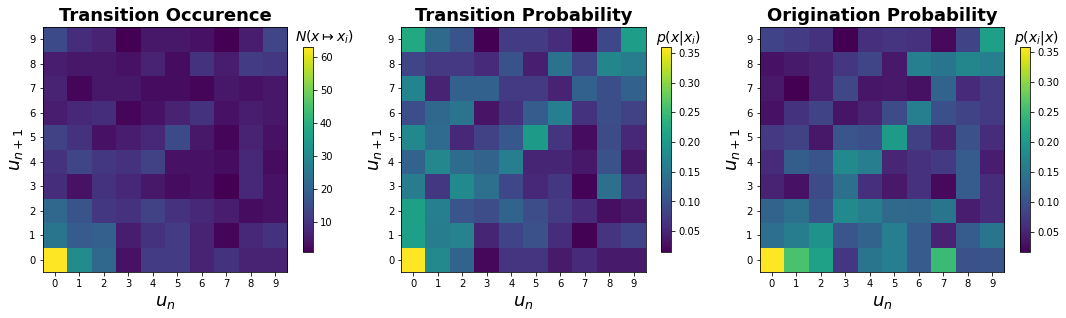

In [ ]:
Occur, _,_ = np.histogram2d(jenny_responses[:-1], jenny_responses[1:])
# Occur, _,_ = np.histogram2d(edf_samples[:-1], edf_samples[1:])



Trans = np.diag( np.sum(Occur, axis=1)**-1) @Occur
Orig =  Occur @ np.diag( np.sum(Occur, axis=0)**-1) 

fig, ax = plt.subplots(nrows=1, ncols=3, tight_layout=True, figsize=[15,6])
ax0=ax[0].imshow(Occur, origin='lower')
ax[0].set_xlabel('$u_n$', fontsize=18)
ax[0].set_ylabel('$u_{n+1}$', fontsize=18)
ax[0].set_xticks(np.linspace(0,9,10))
ax[0].set_yticks(np.linspace(0,9,10))
ax[0].set_title('Transition Occurence', fontweight='bold', fontsize=18)

fig.colorbar(ax0, ax=ax[0], shrink=0.5)
ax[0].text(9.8, 8.9, '$ N( x \mapsto x_i)$', fontsize=14)

ax1=ax[1].imshow(Trans, origin='lower')
ax[1].set_xlabel('$u_n$', fontsize=18)
ax[1].set_ylabel('$u_{n+1}$', fontsize=18)
ax[1].set_xticks(np.linspace(0,9,10))
ax[1].set_yticks(np.linspace(0,9,10))
ax[1].set_title('Transition Probability', fontweight='bold', fontsize=18)

fig.colorbar(ax1, ax=ax[1], shrink=0.5)
ax[1].text(9.9, 8.9, '$p(x |x_i)$', fontsize=14)


ax2=ax[2].imshow(Orig, origin='lower')
ax[2].set_xlabel('$u_n$', fontsize=18)
ax[2].set_ylabel('$u_{n+1}$', fontsize=18)
ax[2].set_xticks(np.linspace(0,9,10))
ax[2].set_yticks(np.linspace(0,9,10))
ax[2].set_title('Origination Probability', fontweight='bold', fontsize=18)

fig.colorbar(ax2, ax=ax[2], shrink=0.5);
ax[2].text(9.9, 8.9, '$p(x_i |x)$', fontsize=14);

Stdying the transition probabilities, we can see that there is some pattern in our data. If there wasn't, we would see equal probability to transition from any number to a certain number (all rows would have a single color). This is confirmed, with the EDF generated data, which are truly random. 

## Stationary Distribution and Potential

The stationary distribution is defined as the probability to find ourselves at a specific number after infinite steps of the Markov Chain. This can be found using the first left eigenvector of the transition probability matrix:   
$v_1 T = \lambda_1 v_1 $  ,   $\lambda_1 =1$  ,  $\pi = \frac{v_1}{\sum v_1}$

The potential representation of the markov chain cen be found under the assumption of a Boltzmann distribution:

$\pi_i = e^{-U(i)/T}$


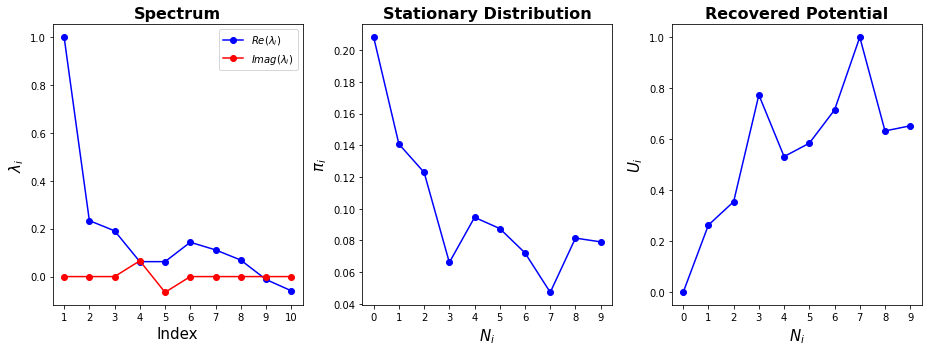

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(Trans.T)

stationary =np.real( eigenvectors[:,0]/ np.sum(eigenvectors[:,0]))
Urec =  -np.log(stationary)
Urec = (Urec-np.min(Urec))/(np.max(Urec)- np.min(Urec))


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=[13, 5], tight_layout=True)
ax[0].plot(np.arange(1, 11),np.real(eigenvalues), '-o', c='b', label='$Re(\lambda_i)$')
ax[0].plot(np.arange(1, 11),np.imag(eigenvalues), '-o', c='r', label='$Imag(\lambda_i)$')
ax[0].set_xticks(np.arange(1, 11))
ax[0].set_xlabel('Index', fontsize=15)
ax[0].set_ylabel('$\lambda_i$', fontsize=15)
ax[0].legend()
ax[0].set_title('Spectrum', fontweight='bold', fontsize=16)

ax[1].plot(np.arange(10),stationary, '-o', c='b')
ax[1].set_xticks(np.arange(10))
ax[1].set_xlabel('$N_i$', fontsize=15)
ax[1].set_ylabel('$\pi_i$', fontsize=15)
ax[1].set_title('Stationary Distribution', fontweight='bold', fontsize=16)

ax[2].plot(np.arange(10),Urec, '-o', c='b')
ax[2].set_xticks(np.arange(10))
ax[2].set_xlabel('$N_i$', fontsize=15)
ax[2].set_ylabel('$ U_i  $', fontsize=15)
ax[2].set_title('Recovered Potential', fontweight='bold', fontsize=16);

One can see (as expected), that the stationary distribution matches the histogram of occurences obtained in the previous section. This is expected, because, in the context of stationarity (or after inifinite time on the Markov Chain) it doesn't matter which the preceding number is, or equivalently, we have reduced a 2D probability density to a 1D probability density.  

Interestingly, we can derive an equivalent 'Potential' on the discete support of the number 0 to 9. This informs us of the ease or difficulty to transition from one number to the other.

# Graph
Following our analysis of our dataset as a Markov Chain, we can proceed and view our datase as a graph 

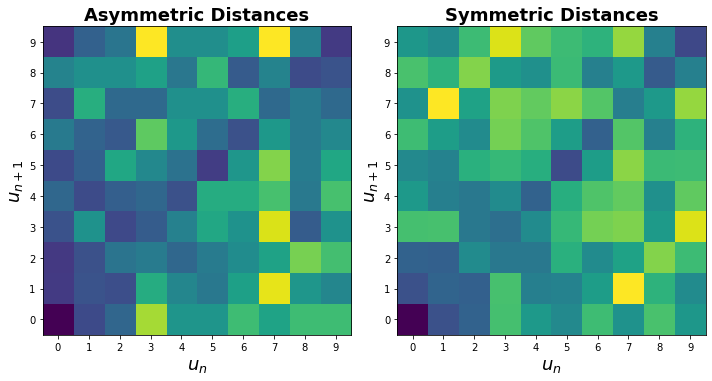

In [ ]:
Dist = -np.log(Trans)

Dist_sym = 1/2*(Dist+Dist.T)

Dist_sym_tr = Dist_sym*0
Dist_sym_tr[Dist_sym<2.5] = Dist_sym[Dist_sym<2.5]

fig, ax = plt.subplots(nrows=1, ncols=2, tight_layout=True, figsize=[10,6])
ax[0].imshow(Dist, origin='lower')
ax[0].set_xlabel('$u_n$', fontsize=18)
ax[0].set_ylabel('$u_{n+1}$', fontsize=18)
ax[0].set_xticks(np.linspace(0,9,10))
ax[0].set_yticks(np.linspace(0,9,10))
ax[0].set_title('Asymmetric Distances', fontweight='bold', fontsize=18)

ax[1].imshow(Dist_sym, origin='lower')
ax[1].set_xlabel('$u_n$', fontsize=18)
ax[1].set_ylabel('$u_{n+1}$', fontsize=18)
ax[1].set_xticks(np.linspace(0,9,10))
ax[1].set_yticks(np.linspace(0,9,10))
ax[1].set_title('Symmetric Distances', fontweight='bold', fontsize=18);

Starting from the transition probabilities between pairs of numbers, we can construct a sense of distance between them. To do this, we use the Arrhenius formula :   
$d(i \rightarrow  j) = - log(p(x_i |x_j))$

These distances are not symmetric by default (it is not as easy to go from i to j as it is to go from j to i). We can construct a symmetric distance metric, by considering the average distance of going from i to j and from j to i.

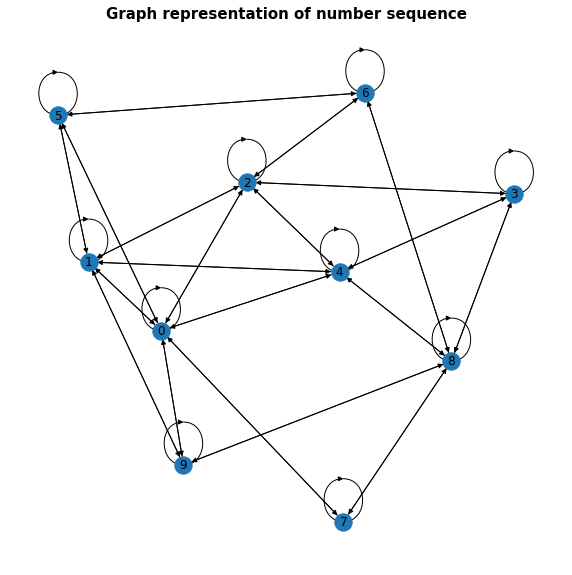

In [ ]:
G1=nx.DiGraph()

graph_con=[]

for i in range(10):
    for j in range(10):
        if Dist_sym[i,j]<np.median(Dist_sym):
            graph_con.append((i,j, Dist_sym[i,j])) #Trans[i,j]))     
#         else:
#             graph_con.append((i,j, 300)) #Trans[i,j]))     
            
G1.add_weighted_edges_from(graph_con)
        
fig, ax=plt.subplots(figsize=[10,10])
nx.draw_kamada_kawai(G1, with_labels = True)#,edge_labels='weight')
ax.set_title('Graph representation of number sequence', fontweight='bold', fontsize=15);

Some 'cheap' results from the graph representation is that 7 and 3 are the most isolated nodes. That is consisted with the potential representation, where they were 'mountains'. It is also consisted with the distribution of numbers, where we found that 7 and 3 had the lowest occurence.